In [1]:
import sys
import os
sys.path.append(os.path.expanduser('~/myPy/VEBTF'))
sys.path.append(os.path.expanduser('~/myPy/VEBTF/src'))
sys.path.append(os.path.expanduser('~/myPy/VEBTF/VEBTF-paper'))
from matplotlib import pyplot as plt
from src.vebtf import VEBTF
import seaborn as sns
import numpy as np
from skimage.restoration import denoise_wavelet, estimate_sigma
import numpy as np
import rpy2.robjects as ro
from rpy2.robjects import numpy2ri
from rpy2.robjects.packages import importr
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from methods.methods import *
import matplotlib.pyplot as plt
import yfinance as yf
import timeit

In [2]:
import pandas as pd
df = pd.read_csv(os.path.expanduser("~/myPy/VEBTF/VEBTF-paper/realdata/dataset/all_six_datasets/ETT-small/ETTh1.csv"))
df.head()

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000


In [3]:
df.shape

(17420, 8)

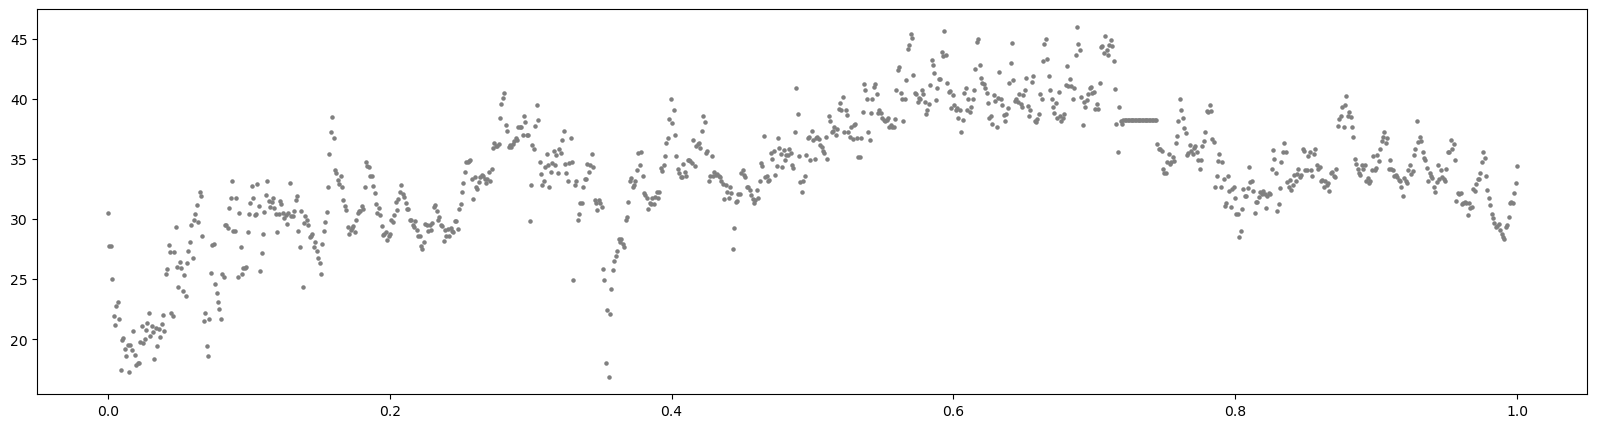

In [4]:
y = df['OT'].values
y = y.squeeze()
n = len(y)
plt.figure(figsize=(20, 5))
plt.scatter(np.linspace(0,1,1000),y[0:1000],color='grey',s=5)
plt.show()

In [193]:
susie20 = susie_tf(L=20)
susie20.fit(y)

R[write to console]: HINT: For an X with many columns, please consider installingthe Rfast package for more efficient credible set (CS)calculations.

R[write to console]: HINT: For an X with many columns, please consider installingthe Rfast package for more efficient credible set (CS)calculations.



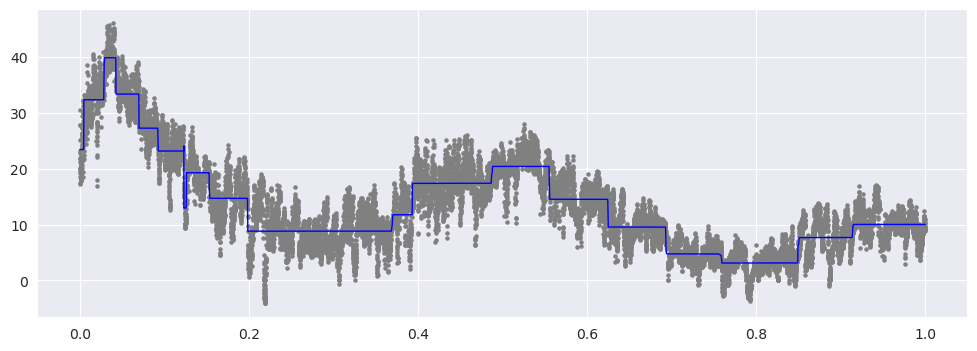

In [196]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 4))
plt.scatter(np.linspace(0,1,len(y)),y,color='grey',s=5)
#plt.plot(np.linspace(0,1,len(y)),model.mu, color='black')
plt.plot(np.linspace(0,1,len(y)),susie20.mu, color='blue',linewidth = 1)
#plt.plot(np.linspace(0,1,len(y)),wave.mu, color='red')
plt.show()

In [195]:
susie100 = susie_tf(L=500)
susie100.fit(y)

R[write to console]: HINT: For an X with many columns, please consider installingthe Rfast package for more efficient credible set (CS)calculations.

R[write to console]: HINT: For an X with many columns, please consider installingthe Rfast package for more efficient credible set (CS)calculations.



In [5]:
# save susie500 as pickle
import pickle
# with open('results/susie500_etth1.pkl', 'wb') as f:
#     pickle.dump(susie100, f)

# reaad susie500 from pickle
with open('results/susie500_etth1.pkl', 'rb') as f:
    susie500 = pickle.load(f)

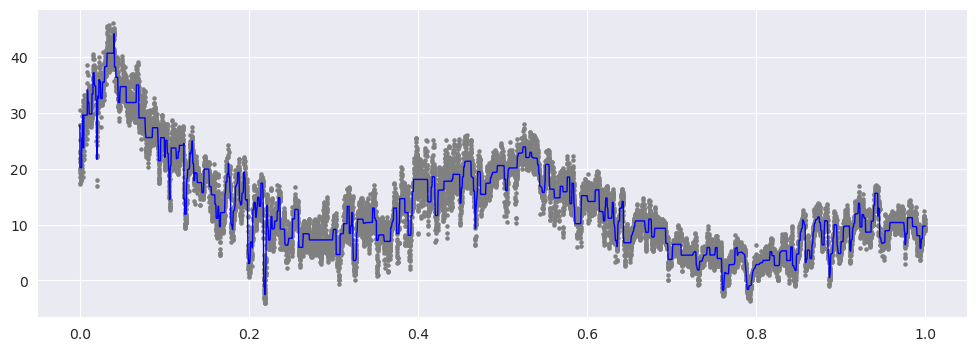

In [6]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 4))
plt.scatter(np.linspace(0,1,len(y)),y,color='grey',s=5)
plt.plot(np.linspace(0,1,len(y)),susie500.mu, color='blue',linewidth = 1)
plt.show()

In [7]:
n = len(y)
genlasso = genlasso_tf(ord=0)
genlasso.fit(y)

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


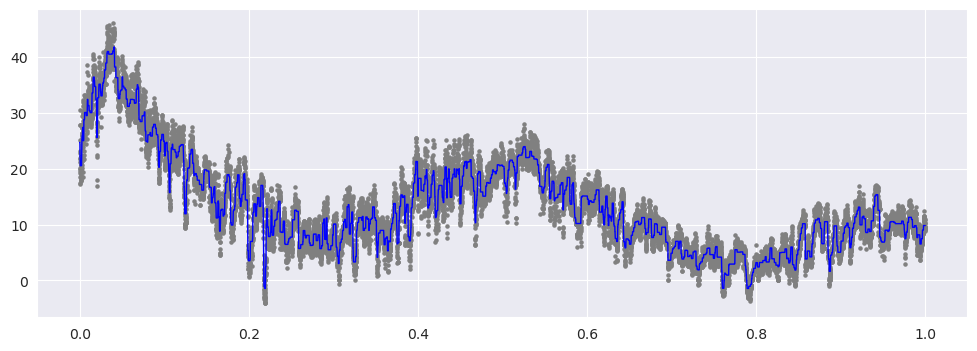

In [8]:
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize=(12, 4))
plt.scatter(np.linspace(0,1,len(y)),y,color='grey',s=5)
plt.plot(np.linspace(0,1,len(y)),genlasso.mu, color='blue',linewidth = 1)
plt.show()

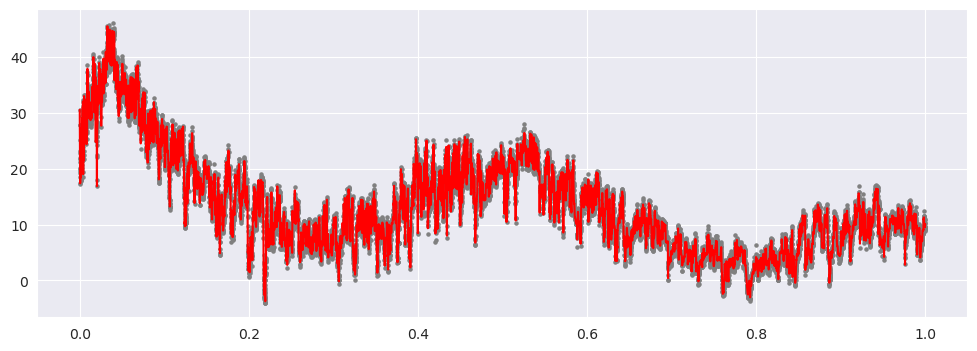

In [43]:
wave = wavelet_denoise(wavelet='haar', num_shifts=n,mode='hard')
wave.fit(y)
plt.figure(figsize=(12, 4))
plt.scatter(np.linspace(0,1,len(y)),y,color='grey',s=5)
plt.plot(np.linspace(0,1,len(y)),wave.mu, color='red')
plt.show()

In [40]:
model = VEBTF(sigma2=1,printevery=100,prior="ash_update",tol=1e-5,point_mass_sd=np.sqrt(1/n)/2,maxiter=1000)
model.fit(y,mu_init = wave.mu)  

Iteration 0: ELBO = -66624.8982354228


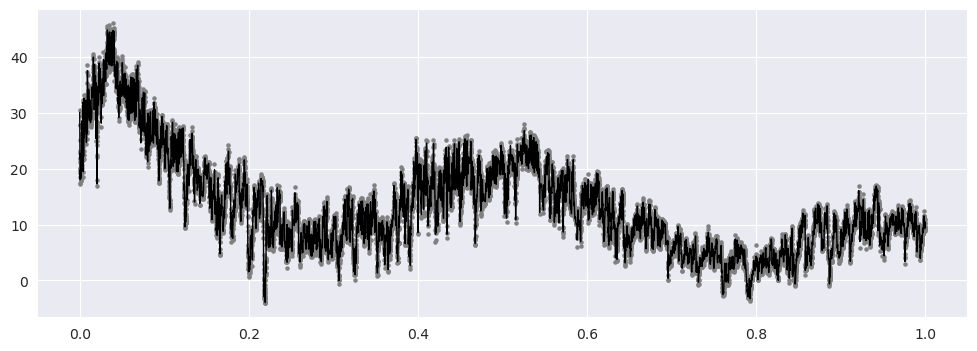

In [41]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 4))
plt.scatter(np.linspace(0,1,len(y)),y,color='grey',s=5)
plt.plot(np.linspace(0,1,len(y)),model.mu, color='black',linewidth=1)
plt.show()

In [14]:
gp = GP_sklearn(kernel='Matern32')
gp.fit(y)

In [15]:
with open('results/gp_matern_etth1.pkl', 'wb') as f:
    pickle.dump(gp, f)

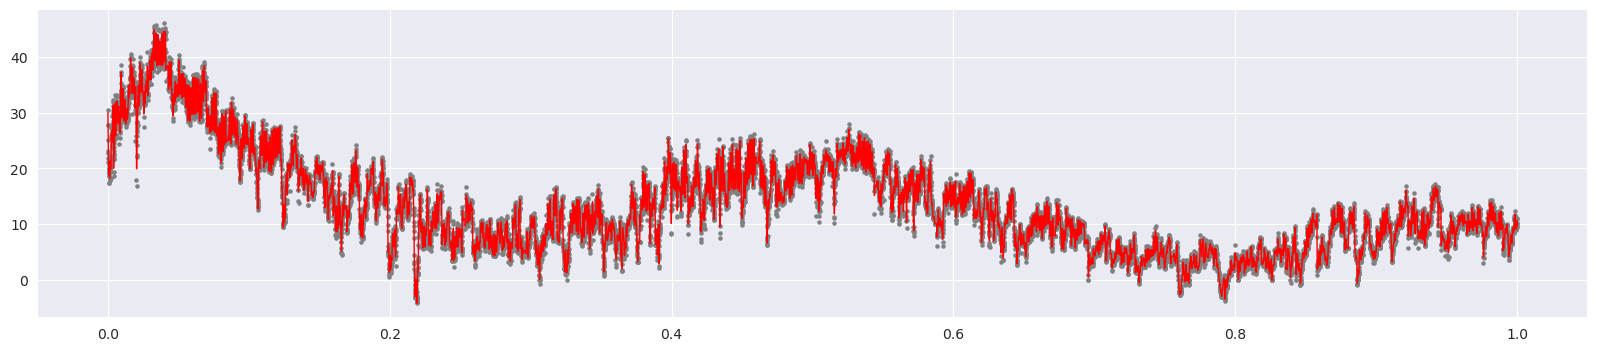

In [16]:
plt.figure(figsize=(20, 4))
plt.scatter(np.linspace(0,1,len(y)),y,color='grey',s=5)
plt.plot(np.linspace(0,1,len(y)),gp.mu, color='red',linewidth=1)
plt.show()

In [ ]:
# df = df.rename(columns={'OT': 'target'})
# df.to_csv("~/VEBTF/VEBTF-paper/realdata/dataset/benchmark/ETTh1.csv", index=False)

In [167]:
# save gp to a pickle file
import pickle
with open('results/gp_rbf_etth1.pkl', 'wb') as f:
    pickle.dump(gp, f)

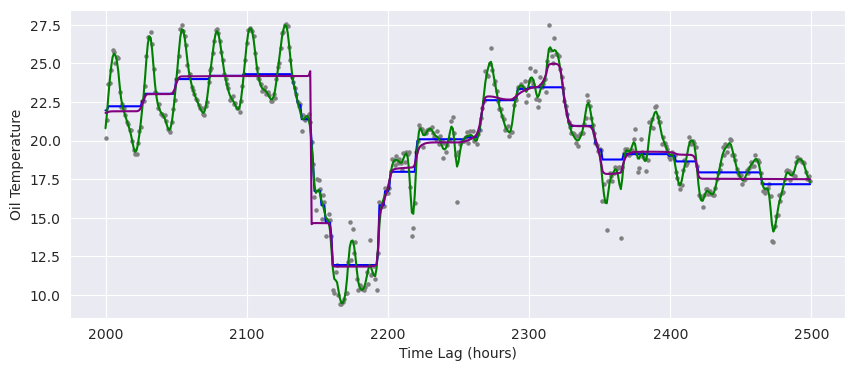

In [48]:
plt.figure(figsize=(10, 4))
x = df['date']
idx = np.arange(2000,2500)
plot_n = len(idx)
plt.scatter(idx,y[idx],color='grey',s=5)
plt.plot(idx,genlasso.mu[idx], color='blue')
plt.plot(idx,wave.mu[idx], color='red')
plt.plot(idx,gp.mu[idx], color='green')
plt.plot(idx,susie500.mu[idx], color='purple')
plt.plot(idx,model.mu[idx], color='black')
plt.legend(['data', 'GenLasso', 'Wavelet', 'GP', 'susie_tf','EBTF'],bbox_to_anchor=(1.04, 1), loc="upper left").remove()
plt.xlabel("Time Lag (hours)")
plt.ylabel("Oil Temperature")
# plt.savefig('results/etth1_first.pdf', bbox_inches='tight')
plt.show()

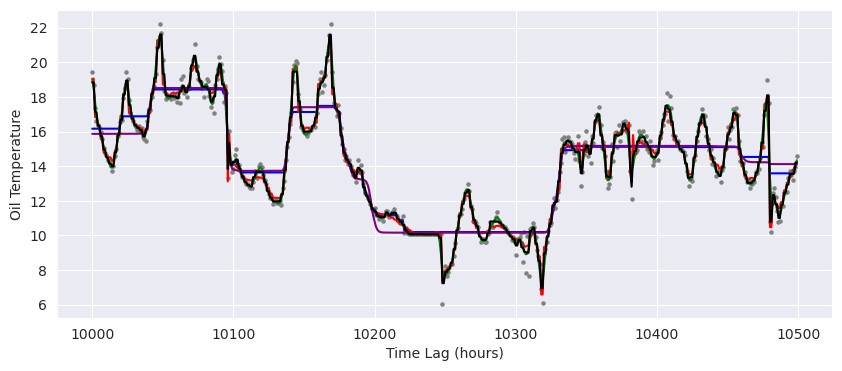

In [45]:
plt.figure(figsize=(10, 4))
x = df['date']
idx = np.arange(10000,10500)
plot_n = len(idx)
plt.scatter(idx,y[idx],color='grey',s=5)
plt.plot(idx,genlasso.mu[idx], color='blue')
plt.plot(idx,wave.mu[idx], color='red')
plt.plot(idx,gp.mu[idx], color='green')
plt.plot(idx,susie500.mu[idx], color='purple')
plt.plot(idx,model.mu[idx], color='black')
plt.legend(['data', 'GenLasso', 'Wavelet', 'GP', 'susie_tf','EBTF'],loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=6).remove()
plt.xlabel("Time Lag (hours)")
plt.ylabel("Oil Temperature")
plt.savefig('results/etth1_second.pdf', bbox_inches='tight')
plt.show()

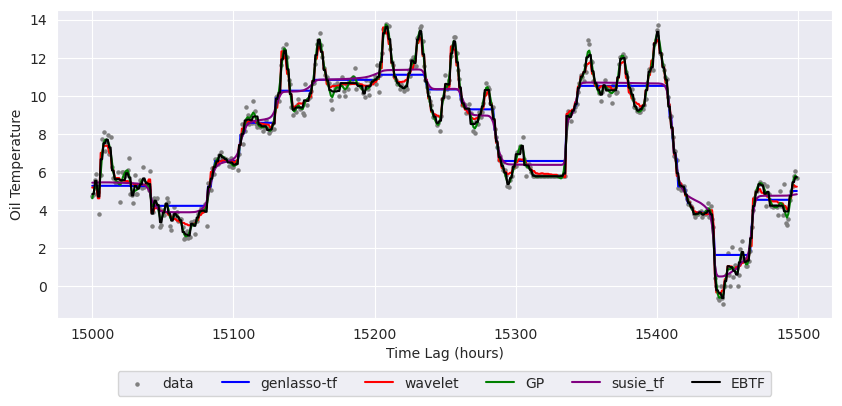

In [46]:
plt.figure(figsize=(10, 4))
x = df['date']
idx = np.arange(15000,15500)
plot_n = len(idx)
plt.scatter(idx,y[idx],color='grey',s=5)
plt.plot(idx,genlasso.mu[idx], color='blue')
plt.plot(idx,wave.mu[idx], color='red')
plt.plot(idx,gp.mu[idx], color='green')
plt.plot(idx,susie500.mu[idx], color='purple')
plt.plot(idx,model.mu[idx], color='black')
plt.legend(['data', 'genlasso-tf', 'wavelet', 'GP', 'susie_tf','EBTF'],loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=6)
plt.xlabel("Time Lag (hours)")
plt.ylabel("Oil Temperature")
plt.savefig('results/etth1_third.pdf', bbox_inches='tight')
plt.show()

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Iteration 0: ELBO = -3106.8252680542096


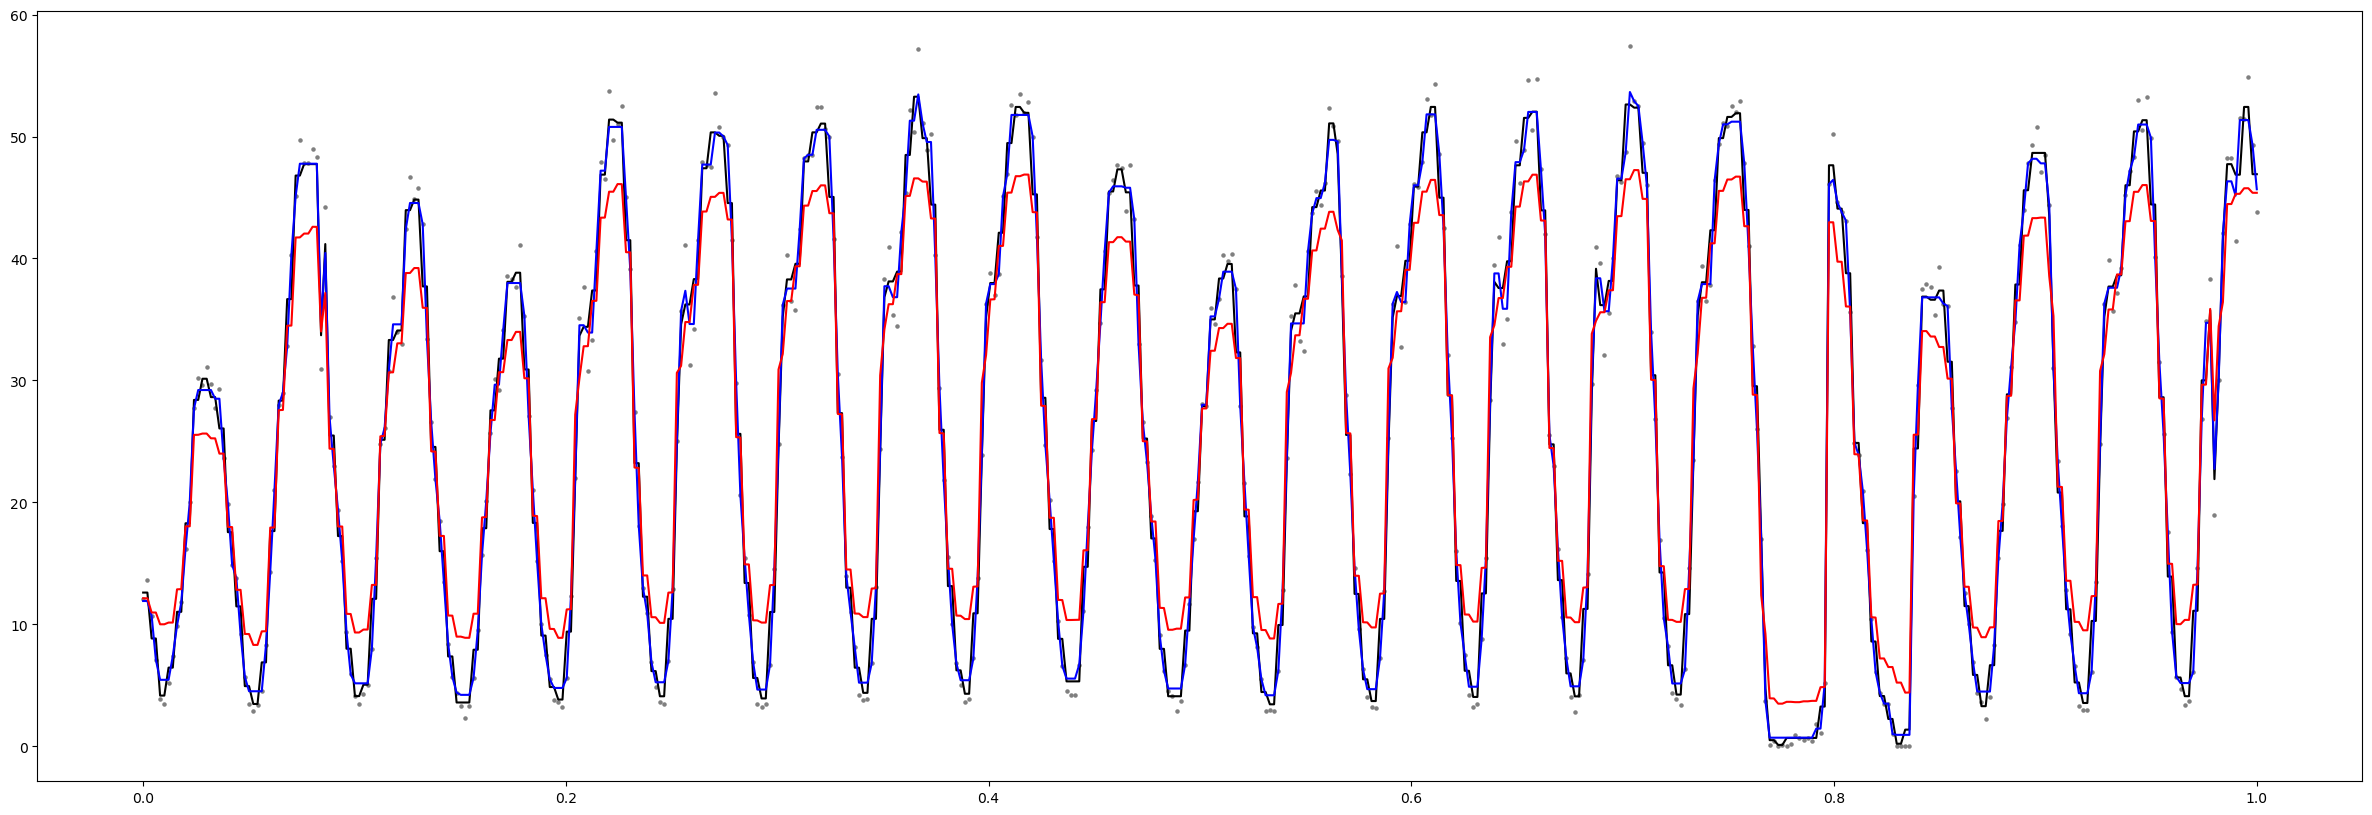

In [140]:
y = y[0:500]
n = len(y)
y = np.array(y,dtype=float)*1000
genlasso = genlasso_tf(ord=0,k=5)
genlasso.fit(y)
model = VEBTF(sigma2=1,printevery=100,prior="ash_update",tol=1e-5,point_mass_sd=np.sqrt(1/n)/2,maxiter=1000,num_shift_wavelet=n,method_wavelet='VisuShrink')
model.fit(y,mu_init = 'wavelet')    
wave = wavelet_denoise(wavelet='haar', num_shifts=n)
wave.fit(y)
plt.figure(figsize=(30, 10))
plt.scatter(np.linspace(0,1,len(y)),y,color='grey',s=5)
plt.plot(np.linspace(0,1,len(y)),model.mu, color='black')
plt.plot(np.linspace(0,1,len(y)),genlasso.mu, color='blue')
plt.plot(np.linspace(0,1,len(y)),wave.mu, color='red')
plt.show()

In [118]:
print(model.pi)
print(model.sk2)

[5.80771972e-01 1.27171858e-02 8.65715503e-03 5.63913342e-03
 3.57111704e-03 2.21921812e-03 1.36125652e-03 8.27355708e-04
 4.99528335e-04 3.00060196e-04 1.79409484e-04 1.06666952e-04
 6.28434804e-05 3.64276680e-05 2.05327107e-05 1.10554163e-05
 5.48714777e-06 2.21800767e-06 2.95627110e-07 3.19417380e-10
 4.52671432e-10 5.53218128e-10 6.21376244e-10 6.70796881e-10
 8.43948000e-10 1.29663252e-09 1.66604535e-09 1.85148565e-09
 1.87552348e-09 1.79904706e-09 1.67484294e-09 1.53336455e-09
 1.39517631e-09 1.27492699e-09 1.17620221e-09 1.09977918e-09
 1.04064501e-09 9.91943590e-10 9.52036681e-10 9.19504298e-10
 8.92812557e-10 8.74104536e-10 8.59234119e-10 8.46755492e-10
 8.34772716e-10 8.24096192e-10 8.12861849e-10 8.01479809e-10
 7.92761178e-10 7.92761178e-10 7.92761178e-10 7.92761178e-10
 7.92761178e-10 3.32938122e-09 2.06373967e-06 4.99534494e-05
 2.85410953e-04 8.34564749e-04 1.39126354e-03 1.58705467e-03
 1.55836973e-03 1.57234277e-03 1.88214213e-03 2.82440672e-03
 4.90410642e-03 7.880687

In [107]:
model.sigma2

3367557.0379062244